### Submitted By: Nishoak Kosaraju
### Roll No: 201020437
### Branch: DSAI

In [ ]:
# Importing the libraries   
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset

In [ ]:
list_ds = tf.data.Dataset.list_files("drive/MyDrive/Car Images/*")
list_ds

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [ ]:
for f in list_ds.take(5):
  print(f.numpy())

b'drive/MyDrive/Car Images/car_0048.jpg'
b'drive/MyDrive/Car Images/car_0038.jpg'
b'drive/MyDrive/Car Images/car_0035.jpg'
b'drive/MyDrive/Car Images/car_0033.jpg'
b'drive/MyDrive/Car Images/car_0002.jpg'


## a. Resize images of the dataset

In [ ]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

def decode(img):
  img = tf.image.decode_jpeg(img, channels=3)
  return img

def resize(img): 
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT]) 

In [ ]:
def get_label(file_path):
  parts = tf.strings.split(file_path, '/')
  return parts


def process_path(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode(img)
  img = resize(img)
  return img,label

In [ ]:
AUTOTUNE=tf.data.experimental.AUTOTUNE                                                        #https://financial-engineering.medium.com/tensorflow-2-0-load-images-to-tensorflow-897b8b067fc2
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

Image shape:  (100, 100, 3)


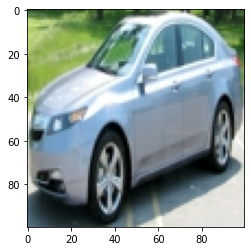

In [ ]:
image = tf.io.read_file('drive/MyDrive/Car Images/car_0030.jpg')      #Before resizing
image = tf.image.decode_jpeg(image, channels=3)
print("Image shape: ", image.numpy().shape)
plt.imshow(image.numpy().astype("uint8"))

Image shape:  (224, 224, 3)
tf.Tensor([b'drive' b'MyDrive' b'Car Images' b'car_0046.jpg'], shape=(4,), dtype=string)


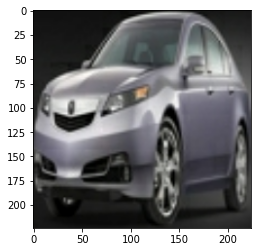

In [ ]:
for image,label in labeled_ds.take(1):                               #After resizing
  print("Image shape: ", image.numpy().shape)
  print(label)

plt.imshow(image.numpy().astype("uint8"))

## b. Convert the colorspace of the image ( RGB to grey, grey to RGB, RGB to HSV, HSV to RGB, etc.)

In [ ]:
def rgb_gray(image):
  img = tf.image.rgb_to_grayscale(image)
  return img

def gray_rgb(image):
  img = tf.image.grayscale_to_rgb(image)
  return img

def rgb_hsv(image):
  img = tf.image.rgb_to_hsv(image)
  return img

def hsv_rgb(image):
  img = tf.image.hsv_to_rgb(image)
  return img

In [ ]:
def process_path_rgb_gray(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = rgb_gray(img)
  return img,label

def process_path_rgb_hsv(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = rgb_hsv(img)
  return img,label

def process_path_hsv_rgb(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = hsv_rgb(img)
  return img,label

In [ ]:
AUTOTUNE=tf.data.experimental.AUTOTUNE                                                        
gray = list_ds.map(process_path_rgb_gray, num_parallel_calls=AUTOTUNE)

In [ ]:
hsv = list_ds.map(process_path_rgb_hsv, num_parallel_calls=AUTOTUNE)

Image shape:  (100, 100, 3)


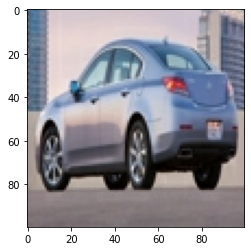

In [ ]:
image = tf.io.read_file('drive/MyDrive/Car Images/car_0045.jpg')     
image = tf.image.decode_jpeg(image, channels=3)
print("Image shape: ", image.numpy().shape)
plt.imshow(image.numpy().astype("uint8"))

Image shape:  (100, 100, 3)
tf.Tensor([b'drive' b'MyDrive' b'Car Images' b'car_0013.jpg'], shape=(4,), dtype=string)


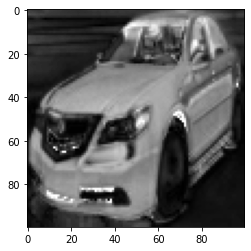

In [ ]:
for image,label in hsv.take(1):                            
  print("Image shape: ", image.numpy().shape)
  print(label)

plt.imshow(image.numpy()[:,:,1], cmap = 'gray')

In [ ]:
graytorgb = []
for image,label in gray: 
  img = gray_rgb(image)
  graytorgb.append([img,label])

In [ ]:
print(graytorgb[0][1])
print(graytorgb[0][0].numpy())

tf.Tensor([b'drive' b'MyDrive' b'Car Images' b'car_0000.jpg'], shape=(4,), dtype=string)
[[[137 137 137]
  [ 92  92  92]
  [135 135 135]
  ...
  [255 255 255]
  [254 254 254]
  [254 254 254]]

 [[128 128 128]
  [108 108 108]
  [126 126 126]
  ...
  [208 208 208]
  [205 205 205]
  [202 202 202]]

 [[122 122 122]
  [105 105 105]
  [140 140 140]
  ...
  [109 109 109]
  [104 104 104]
  [100 100 100]]

 ...

 [[ 49  49  49]
  [ 47  47  47]
  [ 46  46  46]
  ...
  [195 195 195]
  [179 179 179]
  [156 156 156]]

 [[ 48  48  48]
  [ 47  47  47]
  [ 44  44  44]
  ...
  [193 193 193]
  [199 199 199]
  [198 198 198]]

 [[143 143 143]
  [127 127 127]
  [116 116 116]
  ...
  [196 196 196]
  [194 194 194]
  [195 195 195]]]


Image shape:  (100, 100, 3)


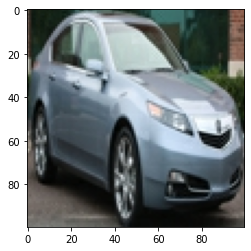

In [ ]:
image = tf.io.read_file('drive/MyDrive/Car Images/car_0035.jpg')     
image = tf.image.decode_jpeg(image, channels=3)
print("Image shape: ", image.numpy().shape)
plt.imshow(image.numpy().astype("uint8"))

Image shape:  (100, 100, 3)
tf.Tensor([b'drive' b'MyDrive' b'Car Images' b'car_0027.jpg'], shape=(4,), dtype=string)


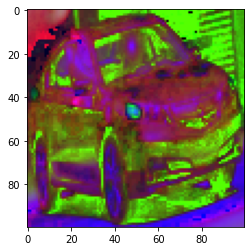

In [ ]:
for image,label in hsv.take(1):                            
  print("Image shape: ", image.numpy().shape)
  print(label)

plt.imshow(image.numpy())

In [ ]:
hsvtorgb = []
for image,label in hsv: 
  img = hsv_rgb(image)
  hsvtorgb.append([img,label])

tf.Tensor([b'drive' b'MyDrive' b'Car Images' b'car_0026.jpg'], shape=(4,), dtype=string)


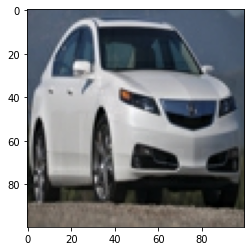

In [ ]:
print(hsvtorgb[0][1])
plt.imshow(hsvtorgb[0][0].numpy())

## c. Perform image adjustment on a given dataset ( Adjust Brightness, Contrast, Gamma, etc.)

In [ ]:
def contrast(image):
  img = tf.image.adjust_contrast(image, 2.)
  return img

def gamma(image):
  img = tf.image.adjust_gamma(image, 0.2)
  return img

In [ ]:
def process_path_brightness(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img,label

def process_path_contrast(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = contrast(img)
  return img,label

def process_path_gamma(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = gamma(img)
  return img,label

In [ ]:
contra = list_ds.map(process_path_contrast, num_parallel_calls=AUTOTUNE)
gama = list_ds.map(process_path_gamma, num_parallel_calls=AUTOTUNE)

Image shape:  (100, 100, 3)


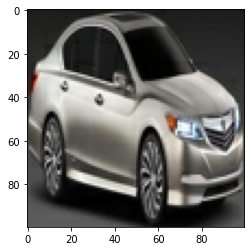

In [ ]:
image = tf.io.read_file('drive/MyDrive/Car Images/car_0005.jpg')     
image = tf.image.decode_jpeg(image, channels=3)
print("Image shape: ", image.numpy().shape)
plt.imshow(image.numpy().astype("uint8"))

Image shape:  (100, 100, 3)


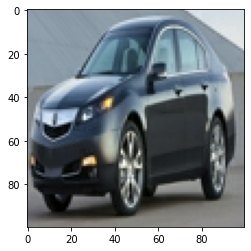

In [ ]:
image = tf.io.read_file('drive/MyDrive/Car Images/car_0047.jpg')     
image = tf.image.decode_jpeg(image, channels=3)
print("Image shape: ", image.numpy().shape)
plt.imshow(image.numpy().astype("uint8"))

Image shape:  (100, 100, 3)


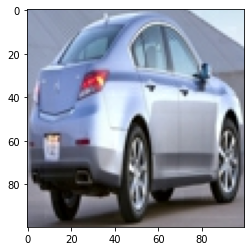

In [ ]:
image = tf.io.read_file('drive/MyDrive/Car Images/car_0039.jpg')     
image = tf.image.decode_jpeg(image, channels=3)
print("Image shape: ", image.numpy().shape)
plt.imshow(image.numpy().astype("uint8"))

## d. Perform Cropping, Flipping, Rotating, and Transposing through TensorFlow

In [ ]:
def crop(image):
  BATCH_SIZE = 1
  NUM_BOXES = 5
  IMAGE_HEIGHT = 256
  IMAGE_WIDTH = 256
  CHANNELS = 3
  CROP_SIZE = (24, 24)

  image = tf.random.normal(shape=(BATCH_SIZE, IMAGE_HEIGHT, IMAGE_WIDTH,
  CHANNELS) )
  boxes = tf.random.uniform(shape=(NUM_BOXES, 4))
  box_indices = tf.random.uniform(shape=(NUM_BOXES,), minval=0,
  maxval=BATCH_SIZE, dtype=tf.int32)
  img = tf.image.crop_and_resize(image, boxes, box_indices, CROP_SIZE)
  return img

def flip(image):
  img = tf.image.flip_left_right(image)
  return img

def transpose(image):
  img = tf.image.transpose(image)
  return img


In [ ]:
def process_path_crop(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = crop(img)
  return img,label

def process_path_flip(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = flip(img)
  return img,label

def process_path_transpose(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = transpose(img)
  return img,label

In [ ]:
Crop = list_ds.map(process_path_crop, num_parallel_calls=AUTOTUNE)
Flip = list_ds.map(process_path_flip, num_parallel_calls=AUTOTUNE)
Transpose = list_ds.map(process_path_transpose, num_parallel_calls=AUTOTUNE)

Image shape:  (100, 100, 3)


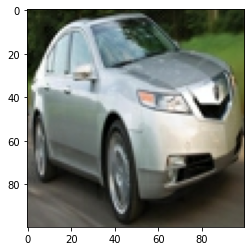

In [ ]:
image = tf.io.read_file('drive/MyDrive/Car Images/car_0032.jpg')     
image = tf.image.decode_jpeg(image, channels=3)
print("Image shape: ", image.numpy().shape)
plt.imshow(image.numpy().astype("uint8"))

Image shape:  (100, 100, 3)
tf.Tensor([b'drive' b'MyDrive' b'Car Images' b'car_0022.jpg'], shape=(4,), dtype=string)


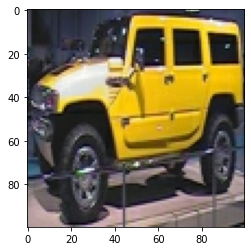

In [ ]:
for image,label in Flip.take(1):                            
  print("Image shape: ", image.numpy().shape)
  print(label)

plt.imshow(image.numpy())

In [ ]:
image = tf.io.read_file('drive/MyDrive/Car Images/car_0039.jpg')      
image = tf.image.decode_jpeg(image, channels=3)
print(image.numpy())

[[[146 156 183]
  [139 149 176]
  [143 155 179]
  ...
  [208 228 239]
  [208 227 241]
  [208 227 241]]

 [[149 159 186]
  [147 157 184]
  [139 151 175]
  ...
  [209 229 240]
  [210 229 243]
  [209 228 242]]

 [[146 158 184]
  [147 159 185]
  [146 156 181]
  ...
  [212 232 243]
  [212 232 243]
  [211 231 242]]

 ...

 [[106 105 121]
  [104 103 117]
  [104 103 117]
  ...
  [147 144 153]
  [149 143 153]
  [146 140 150]]

 [[101 100 114]
  [ 99  99 111]
  [ 97  97 109]
  ...
  [149 143 153]
  [148 143 150]
  [146 141 148]]

 [[102 102 114]
  [100 100 112]
  [ 99  99 111]
  ...
  [143 137 147]
  [142 137 144]
  [143 138 145]]]


In [ ]:
for image,label in Transpose.take(1):  
  print(label)                          
  print(image.numpy())

tf.Tensor([b'drive' b'MyDrive' b'Car Images' b'car_0023.jpg'], shape=(4,), dtype=string)
[[[ 30  31  25]
  [ 29  30  24]
  [ 29  32  25]
  ...
  [132 130 143]
  [131 129 140]
  [133 131 142]]

 [[ 34  35  29]
  [ 30  31  25]
  [ 26  29  22]
  ...
  [131 129 140]
  [137 135 146]
  [134 132 143]]

 [[ 31  32  24]
  [ 30  31  23]
  [ 34  35  29]
  ...
  [128 128 138]
  [131 131 141]
  [133 133 141]]

 ...

 [[ 40  39  37]
  [ 40  39  37]
  [ 44  43  41]
  ...
  [118 118 126]
  [116 115 121]
  [116 115 121]]

 [[ 46  45  43]
  [ 47  46  44]
  [ 46  46  44]
  ...
  [121 121 129]
  [116 115 121]
  [114 113 119]]

 [[ 53  52  50]
  [ 50  49  47]
  [ 41  41  39]
  ...
  [120 120 128]
  [117 116 122]
  [115 114 120]]]


## e. Apply Image decoding and encoding (decode_jpeg, encode_jpeg, decode_png, encode_png)

In [ ]:
image = tf.io.read_file('drive/MyDrive/Car Images/car_0049.jpg')     
image = tf.image.decode_jpeg(image, channels=3)
image

<tf.Tensor: shape=(100, 100, 3), dtype=uint8, numpy=
array([[[120, 150, 176],
        [118, 148, 174],
        [118, 148, 176],
        ...,
        [ 57,  74,  38],
        [ 32,  47,  16],
        [ 40,  55,  26]],

       [[115, 146, 167],
        [121, 151, 175],
        [117, 147, 173],
        ...,
        [ 60,  77,  41],
        [ 50,  67,  35],
        [ 50,  67,  35]],

       [[119, 148, 164],
        [116, 147, 165],
        [120, 150, 174],
        ...,
        [ 62,  79,  43],
        [ 58,  75,  41],
        [ 47,  67,  32]],

       ...,

       [[179, 169, 159],
        [178, 168, 158],
        [178, 170, 157],
        ...,
        [171, 165, 149],
        [171, 165, 149],
        [171, 164, 148]],

       [[175, 165, 155],
        [176, 166, 156],
        [177, 169, 156],
        ...,
        [169, 166, 149],
        [171, 165, 151],
        [169, 163, 149]],

       [[176, 166, 156],
        [176, 166, 156],
        [177, 169, 156],
        ...,
        [169, 168, 15

In [ ]:
image = tf.image.encode_jpeg(image, format="rgb")
image

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00d\x00d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x8